In [1]:
# Install required packages (run once)
!pip install pandas scikit-learn matplotlib seaborn



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np


In [3]:
# Load dataset (place CSV in same folder as this script/notebook)
df = pd.read_csv('bank-additional-full.csv', sep=';')

# Inspect first rows
print("Dataset Preview:")
print(df.head())


Dataset Preview:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  eurib

In [4]:
# Check data info and missing values
print("\nDataset Info:")
df.info()

print("\nMissing values per column:")
print(df.isnull().sum())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   

In [5]:
# Encode target variable 'y' (yes=1, no=0)
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Identify categorical columns (excluding target)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Safely remove 'y' if exists (usually not needed as mapped already)
if 'y' in categorical_cols:
    categorical_cols.remove('y')

# Label encode categorical features
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print("\nAfter encoding categorical columns:")
print(df.head())



After encoding categorical columns:
   age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
1   57    7        1          3        1        0     0        1      6   
2   37    7        1          3        0        2     0        1      6   
3   40    0        1          1        0        0     0        1      6   
4   56    7        1          3        0        0     2        1      6   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1  ...         1    999         0         1           1.1   
1            1  ...         1    999         0         1           1.1   
2            1  ...         1    999         0         1           1.1   
3            1  ...         1    999         0         1           1.1   
4            1  ...         1    999         0         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0    

In [6]:
# Features and target
X = df.drop('y', axis=1)
y = df['y']

# Check for NaNs and drop if any in features or target
df_clean = df.dropna(subset=['y'])
X = df_clean.drop('y', axis=1)
y = df_clean['y']

# Stratified train-test split to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")


Training set shape: (30891, 20), (30891,)
Test set shape: (10297, 20), (10297,)


In [7]:
print(X_train.dtypes)         # Make sure ALL are int or float
print(X_train.isnull().sum()) # Make sure ZERO NaNs in features
print(y_train.isnull().sum()) # Make sure ZERO NaNs in target
print(y_train.unique())       # Make sure there are only 0/1



age                 int64
job                 int64
marital             int64
education           int64
default             int64
housing             int64
loan                int64
contact             int64
month               int64
day_of_week         int64
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64
0
[0 1]


In [8]:
import numpy as np
import pandas as pd

# 1. Convert all features to numeric, coercing errors to NaN
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test  = X_test.apply(pd.to_numeric, errors='coerce')

# 2. Replace infinities with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# 3. Drop rows with any NaN in training set (keep X and y aligned)
train_data = pd.concat([X_train, y_train], axis=1).dropna()
X_train = train_data.drop('y', axis=1)
y_train = train_data['y']

# 4. Same for test set
test_data = pd.concat([X_test, y_test], axis=1).dropna()
X_test = test_data.drop('y', axis=1)
y_test = test_data['y']

# 5. Ensure types are int/float
print(X_train.dtypes)
print(y_train.unique())


age                 int64
job                 int64
marital             int64
education           int64
default             int64
housing             int64
loan                int64
contact             int64
month               int64
day_of_week         int64
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object
[0 1]


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Sample dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)




In [10]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


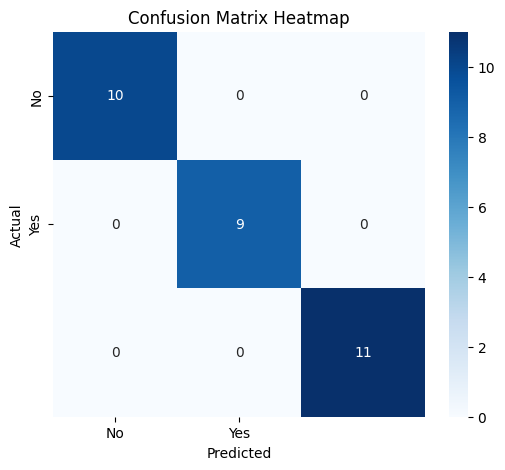

In [11]:
# Plot confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


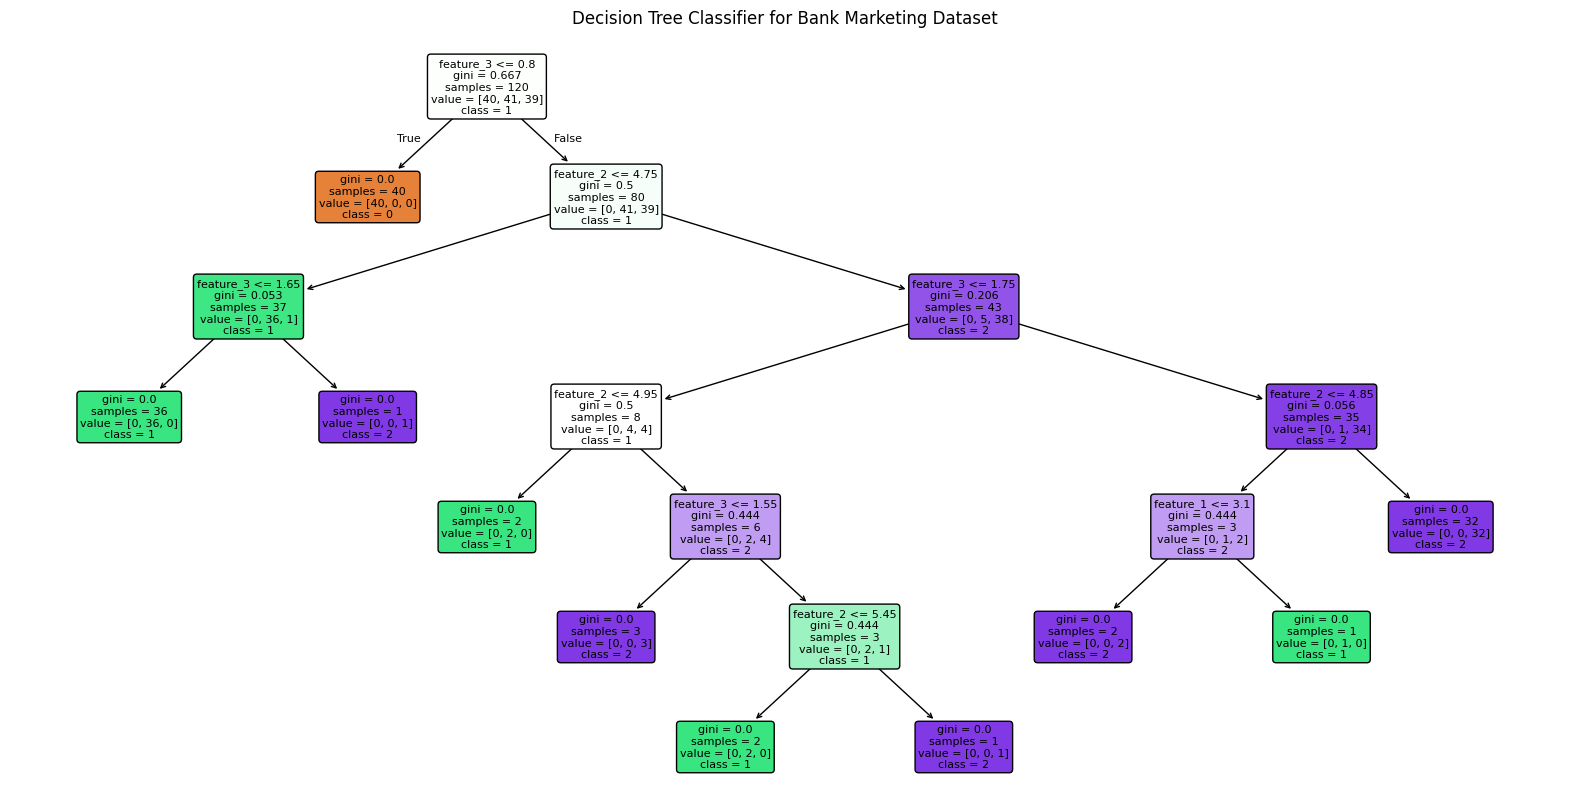

In [12]:
# 📌 Plot Decision Tree in Jupyter

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Make sure the model is fitted
dtc.fit(X_train, y_train)

# Get feature names safely
if hasattr(X_train, 'columns'):
    feature_names = X_train.columns
else:
    feature_names = [f'feature_{i}' for i in range(X_train.shape[1])]

# Auto-detect class names from fitted model
class_names = [str(c) for c in dtc.classes_]

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(
    dtc,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title('Decision Tree Classifier for Bank Marketing Dataset')
plt.show()


